In [1]:
%pylab inline
import os # for path joining per os

Populating the interactive namespace from numpy and matplotlib


Breast cancer wisconsin (diagnostic) dataset
============================================

## Introduction

The dataset is a sample dataset from sklearn and comes shipped with the package. It is a binary classification of whether a biopsied breast mass contains cancer or not provided by the University of Wisconsin A short description is found in the sklearn documentation https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

The description is copied in the cell below so that you do not need to visit the above link.

This dataset is useful to me in particular as my PhD work is in medical imaging and some of the work I do is diagnostic imaging for breast cancer screening. This dataset is a classic machine learning dataset that deals with the classification of breast cancer biopsies to see if breast masses are malignant or not using features from a fine needle aspirate of a breast mass. This would be the next step in cancer diagnosis following a positive result in a diagnostic image from a mammography machine which is an imaging tests that my research is involved with. To see the bigger picture in the cancer diagnosis process in our clinic I am very interested in this process, that is why I chose this specific dataset.

The idea behind this dataset would be to train a model that is able to use the features to classify a new sample as is benign or malignant with high accuracy.

### Sklearn Documentation Entry

**Data Set Characteristics:**

> Number of Instances: 569
>
> Number of Attributes: 30 numeric, predictive attributes and the class
>
> Attribute Information
>
>     -   radius (mean of distances from center to points on the
>         perimeter)
>     -   texture (standard deviation of gray-scale values)
>     -   perimeter
>     -   area
>     -   smoothness (local variation in radius lengths)
>     -   compactness (perimeter\^2 / area - 1.0)
>     -   concavity (severity of concave portions of the contour)
>     -   concave points (number of concave portions of the contour)
>     -   symmetry
>     -   fractal dimension ("coastline approximation" - 1)
>
>     The mean, standard error, and "worst" or largest (mean of the
>     three worst/largest values) of these features were computed for
>     each image, resulting in 30 features. For instance, field 0 is
>     Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.
>
>     -   
>
>         class:
>
>         *   -   WDBC-Malignant
>             -   WDBC-Benign
>
> ** Summary Statistics **
>  
>
> |                                         Min     Max
> |   ------------------------------------- ------- --------
> |   radius (mean):                        6.981   28.11
> |   texture (mean):                       9.71    39.28
> |   perimeter (mean):                     43.79   188.5
> |   area (mean):                          143.5   2501.0
> |   smoothness (mean):                    0.053   0.163
> |   compactness (mean):                   0.019   0.345
> |   concavity (mean):                     0.0     0.427
> |   concave points (mean):                0.0     0.201
> |   symmetry (mean):                      0.106   0.304
> |   fractal dimension (mean):             0.05    0.097
> |   radius (standard error):              0.112   2.873
> |   texture (standard error):             0.36    4.885
> |   perimeter (standard error):           0.757   21.98
> |   area (standard error):                6.802   542.2
> |   smoothness (standard error):          0.002   0.031
> |   compactness (standard error):         0.002   0.135
> |   concavity (standard error):           0.0     0.396
> |   concave points (standard error):      0.0     0.053
> |   symmetry (standard error):            0.008   0.079
> |   fractal dimension (standard error):   0.001   0.03
> |   radius (worst):                       7.93    36.04
> |   texture (worst):                      12.02   49.54
> |   perimeter (worst):                    50.41   251.2
> |   area (worst):                         185.2   4254.0
> |   smoothness (worst):                   0.071   0.223
> |   compactness (worst):                  0.027   1.058
> |   concavity (worst):                    0.0     1.252
> |   concave points (worst):               0.0     0.291
> |   symmetry (worst):                     0.156   0.664
> |   fractal dimension (worst):            0.055   0.208
>

> Missing Attribute Values:  None
>
> Class Distribution:  212 - Malignant, 357 - Benign
>
> Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian
>
> Donor:  Nick Street
>
> Date:  November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
<https://goo.gl/U2Uwz2>

Features are computed from a digitized image of a fine needle aspirate
(FNA) of a breast mass. They describe characteristics of the cell nuclei
present in the image.

Separating plane described above was obtained using Multisurface
Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via
Linear Programming." Proceedings of the 4th Midwest Artificial
Intelligence and Cognitive Science Society, pp. 97-101, 1992], a
classification method which uses linear programming to construct a
decision tree. Relevant features were selected using an exhaustive
search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the
3-dimensional space is that described in: [K. P. Bennett and O. L.
Mangasarian: "Robust Linear Programming Discrimination of Two Linearly
Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

`ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/`

**References**

-   W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature
    extraction for breast tumor diagnosis. IS&T/SPIE 1993 International
    Symposium on Electronic Imaging: Science and Technology, volume
    1905, pages 861-870, San Jose, CA, 1993.
-   O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer
    diagnosis and prognosis via linear programming. Operations Research,
    43(4), pages 570-577, July-August 1995.
-   W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning
    techniques to diagnose breast cancer from fine-needle aspirates.
    Cancer Letters 77 (1994) 163-171.

## The assignment question is as follows:

4 - Use your data and find the best hyperparameters of a Logistic Regression (for a classification) using GridSearch. There are many hyperparameters here. Based on your experiences, choose at least 5 hyperparameters that you think are more important. For example, one could be regularization; L1 and L2.

In [2]:
#Import packages
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Import the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.gridspec as gridspec
import pandas as pd

### Load the data from the sklearn package

In [3]:
# Load the data
data = load_breast_cancer()
X, Y = data.data, data.target

### Balance the data

I will make the data balanced for training by removing some of the benign samples. Since the data is random it shouldn't matter if I take the first n samples that are benign instead of all of them.

This is unfortunate to remove about a hundred data samples and perhaps having a shuffle of minibatches that are balanced would be best approach in the future. However the dataset still has over 400 samples which is an allowable number for how many features the dataset has.

In [4]:
print(f'Before balancing {-np.sum(Y) + len(Y)} malignant, {np.sum(Y)} benign')

X_b, Y_b = X[Y == 1], Y[Y == 1]
X_m, Y_m = X[Y == 0], Y[Y == 0]

X_bal = np.concatenate((X_b[:212],X_m))
Y_bal = np.concatenate((Y_b[:212],Y_m))

print(f'After balancing {-np.sum(Y_bal) + len(Y_bal)} malignant, {np.sum(Y_bal)} benign')

Before balancing 212 malignant, 357 benign
After balancing 212 malignant, 212 benign


### The dataset is not too large so in this instance I will use the full dataset

In [5]:
# Split for validation set
X_tr, X_va, Y_tr, Y_va = train_test_split(X_bal, Y_bal, test_size=0.2)

print('training set == ', np.shape(X_tr), np.shape(Y_tr),
      ', validation set == ', np.shape(X_va), np.shape(Y_va))

training set ==  (339, 30) (339,) , validation set ==  (85, 30) (85,)


### Normalized Data

#### Applying the standard scaler to the data

In [6]:
# Apply the standard scaler
scaler_S = StandardScaler().fit(X_tr) # Only fit on the training
X_tr_Norm = scaler_S.transform(X_tr)
X_va_Norm = scaler_S.transform(X_va)

#### The standard scaler really spread out the data and pushed the mean back from ~0.2 to 0

## Applying the Logistic Regression classifier with Normalization

### Initialize the Logistic Regression using a grid search
#### Look at the docstring of the logistic regression to see what perameters to search over

In [7]:
print(LogisticRegression.__doc__)


    Logistic Regression (aka logit, MaxEnt) classifier.

    In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
    scheme if the 'multi_class' option is set to 'ovr', and uses the
    cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
    (Currently the 'multinomial' option is supported only by the 'lbfgs',
    'sag', 'saga' and 'newton-cg' solvers.)

    This class implements regularized logistic regression using the
    'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
    that regularization is applied by default**. It can handle both dense
    and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
    floats for optimal performance; any other input format will be converted
    (and copied).

    The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
    with primal formulation, or no regularization. The 'liblinear' solver
    supports both L1 and L2 regularization, with a d

### Parameters to search

I chose to grid search over all of the solvers, but to do this I had to search with different regularization for each solver as most of them do not support all regularization.

Depending on if the solver had regularization I also grid searched over the penalty L1, L2, or elasicnet combination. As well as the coefficient C to control the strength of regularization which I log scaled between 1e-3 to 100 in log steps.

Other parameters I used were the max iteration as sometimes the model did not converge especially with saga solver. I didn't do too many trials with the saga solver as it never converged and spit out an annoying error message.

Whether the classes are ballanced or equally weighted and whether to use a fit intercept or not were also used as variables to grid search based upon:

    class_weight
       The "balanced" mode uses the values of y to automatically adjust
        weights inversely proportional to class frequencies in the input data
        as ``n_samples / (n_classes * np.bincount(y))``.
        
    fit_intercept : bool, default=True
        Specifies if a constant (a.k.a. bias or intercept) should be
        added to the decision function.

In [24]:
# Make a parameter grid with different variables
# Grid specifying options for each solver
param_grid = [
    {'solver': ['liblinear'],
      'penalty': ['l1', 'l2'],
      'C': np.logspace(-3, 2, 6),
      'max_iter' : [300,400],
      'class_weight' : ['balanced', None],
      'fit_intercept' : [True,False]
    },
    {'solver': ['newton-cg','lbfgs'],
      'penalty': ['l2'],
      'C': np.logspace(-3, 2, 6),
      'max_iter' : [300,400],
      'class_weight' : ['balanced', None],
      'fit_intercept' : [True,False]
    },
    {'solver': ['newton-cg','lbfgs'],
      'penalty': ['none'],
      'max_iter' : [300,400],
      'class_weight' : ['balanced', None],
      'fit_intercept' : [True,False]
    },
    {'solver': ['saga'],
      'penalty': ['elasticnet'],
      'l1_ratio' : [0.2, 0.4],
      'C': [1],
      'max_iter' : [200],
    }
    ]

# Initialize an empty regressor
reg = LogisticRegression()
# Initialize a K-Fold cross validator
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=5)
# Initialize the grid search algorithm
search = GridSearchCV(estimator=reg, param_grid=param_grid, n_jobs=8, return_train_score=True, cv=cv)
# Perform the grid search
search.fit(X_tr_Norm, Y_tr)

/home/xcite/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/xcite/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/xcite/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/xcite/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/xcite/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/xcite/ana

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=2, random_state=None),
             estimator=LogisticRegression(), n_jobs=8,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'class_weight': ['balanced', None],
                          'fit_intercept': [True, False],
                          'max_iter': [300, 400], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']},
                         {'C': array([1.e-03, 1.e-02, 1.e-0...
                          'fit_intercept': [True, False],
                          'max_iter': [300, 400], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs']},
                         {'class_weight': ['balanced', None],
                          'fit_intercept': [True, False],
                          'max_iter': [300, 400], 'penalty': ['none'],
                          'solver': ['newton-cg', 'lbfgs']},
                      

### Look at the Performance from the grid search in a dataframe (from sklearn example)

## Looking at the 25 best combinations

In [25]:
results_df = pd.DataFrame(search.cv_results_) # make a dataframe
results_df = results_df.sort_values(by=["rank_test_score"]) # Sort by test score
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel") # give descriptive name
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score","mean_train_score","std_train_score"]][:25] # Look at mean and variation in scores

,params,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score
kernel,,,,,,
1_0.4_200_elasticnet_saga,"{'C': 1, 'l1_ratio': 0.4, 'max_iter': 200, 'pe...",1,0.967560,0.009579,0.985827,0.008459
1.0_balanced_True_400_l2_lbfgs,"{'C': 1.0, 'class_weight': 'balanced', 'fit_in...",2,0.967557,0.009933,0.987010,0.007395
1.0_balanced_True_400_l2_newton-cg,"{'C': 1.0, 'class_weight': 'balanced', 'fit_in...",2,0.967557,0.009933,0.987010,0.007395
1.0_balanced_True_300_l2_lbfgs,"{'C': 1.0, 'class_weight': 'balanced', 'fit_in...",2,0.967557,0.009933,0.987010,0.007395
1.0_balanced_True_300_l2_newton-cg,"{'C': 1.0, 'class_weight': 'balanced', 'fit_in...",2,0.967557,0.009933,0.987010,0.007395
1_0.2_200_elasticnet_saga,"{'C': 1, 'l1_ratio': 0.2, 'max_iter': 200, 'pe...",6,0.966965,0.010612,0.985827,0.008459
0.1_balanced_True_400_l2_lbfgs,"{'C': 0.1, 'class_weight': 'balanced', 'fit_in...",7,0.966366,0.010577,0.979930,0.007588
0.1_balanced_True_400_l2_newton-cg,"{'C': 0.1, 'class_weight': 'balanced', 'fit_in...",7,0.966366,0.010577,0.979930,0.007588
0.1_balanced_True_300_l2_lbfgs,"{'C': 0.1, 'class_weight': 'balanced', 'fit_in...",7,0.966366,0.010577,0.979930,0.007588


#### It looks like the elasticnet saga solver actually performed the best with a regularization strength of 1 l1 ratio of 0.4 even though it did not converge, however many of the other algorithms had very very similar performance. 

#### Interestingly many of the top choices had the balanced weighting option, since the models converged many of the top algorithms are present for max_iter of 300 and 400 as the max iteration was never reached and both models returned the same value.

### Look at the 25 worst combinations

In [10]:
results_df = pd.DataFrame(search.cv_results_) # make a dataframe
results_df = results_df.sort_values(by=["rank_test_score"]) # Sort by test score
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel") # give descriptive name
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score","mean_train_score","std_train_score"]][-25:] # Look at mean and variation in scores

,params,rank_test_score,mean_test_score,std_test_score,mean_train_score,std_train_score
kernel,,,,,,
0.001_None_False_400_l2_newton-cg,"{'C': 0.001, 'class_weight': None, 'fit_interc...",179,0.917252,0.034880,0.918133,0.007607
0.001_balanced_False_300_l2_newton-cg,"{'C': 0.001, 'class_weight': 'balanced', 'fit_...",179,0.917252,0.034880,0.917395,0.008682
0.001_balanced_False_300_l2_lbfgs,"{'C': 0.001, 'class_weight': 'balanced', 'fit_...",179,0.917252,0.034880,0.917395,0.008682
0.001_balanced_False_400_l2_newton-cg,"{'C': 0.001, 'class_weight': 'balanced', 'fit_...",179,0.917252,0.034880,0.917395,0.008682
0.001_balanced_False_400_l2_lbfgs,"{'C': 0.001, 'class_weight': 'balanced', 'fit_...",179,0.917252,0.034880,0.917395,0.008682
0.001_None_False_300_l2_newton-cg,"{'C': 0.001, 'class_weight': None, 'fit_interc...",179,0.917252,0.034880,0.918133,0.007607
0.001_None_False_300_l2_lbfgs,"{'C': 0.001, 'class_weight': None, 'fit_interc...",179,0.917252,0.034880,0.918133,0.007607
0.001_None_False_300_l2_liblinear,"{'C': 0.001, 'class_weight': None, 'fit_interc...",179,0.917252,0.034880,0.918133,0.007607
0.001_None_False_400_l2_liblinear,"{'C': 0.001, 'class_weight': None, 'fit_interc...",179,0.917252,0.034880,0.918133,0.007607


#### In general it looks like the liblinear solver performed the worst in many cases especially with a really weak regularization coefficient with L1 regularization with increasingly poor results the for lower values of C.

## Testing this combination using the metrics from 4-KNN-Classification-Alfalfa

In [11]:
LG_norm = LogisticRegression(penalty='elasticnet',solver='saga',C=1,l1_ratio=0.2,max_iter=200) #parameters above

LG_norm.fit(X_tr_Norm,Y_tr)  # fit the model with training set (Normalized)

# Looking at both the probability and the prediction
Y_tr_prob = LG_norm.predict_proba(X_tr_Norm)[:,1]
Y_tr_pred = LG_norm.predict(X_tr_Norm)

Y_va_prob = LG_norm.predict_proba(X_va_Norm)[:,1]
Y_va_pred = LG_norm.predict(X_va_Norm)

# Boolean arrays of where the training and validation are one and zero
idx_tr_1 = (Y_tr==1)
idx_tr_0 = (Y_tr==0)

idx_va_1 = (Y_va==1)
idx_va_0 = (Y_va==0)

/home/xcite/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Looking at the target names

In [12]:
data.target_names # reminder of the classes

array(['malignant', 'benign'], dtype='<U9')

### Plot the histograms of the probability in the training set and validation set

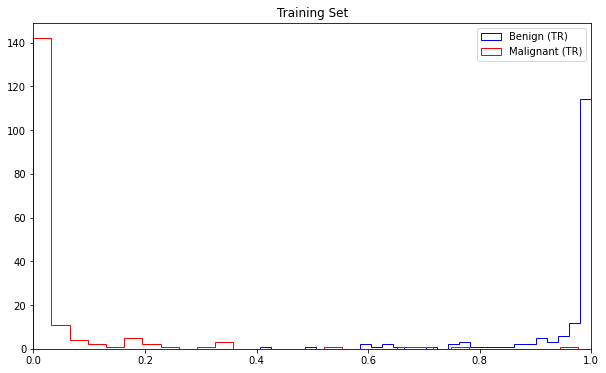

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(Y_tr_prob[idx_tr_1],30,histtype='step',color = "blue", label='Benign (TR)')
plt.hist(Y_tr_prob[idx_tr_0],30,histtype='step',color = "red",label='Malignant (TR)')
plt.xlim([0,1])
plt.title('Training Set')
plt.legend()

### Plotting the probability for the validation set

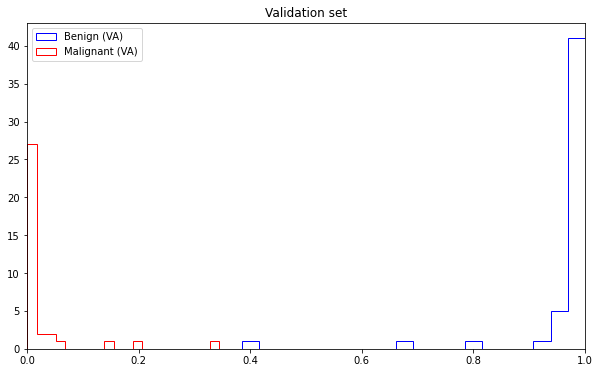

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(Y_va_prob[idx_va_1],20,histtype='step',color = "blue", label='Benign (VA)')
plt.hist(Y_va_prob[idx_va_0],20,histtype='step',color = "red",label='Malignant (VA)')
plt.title('Validation set')
plt.xlim([0,1])
plt.legend()

#### The training and validation show similar classifications and both show little overlap. The validation does not show too many edge cases such as those shown in the training set.

### Plot the AUC curves

/home/xcite/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'AUC Training')

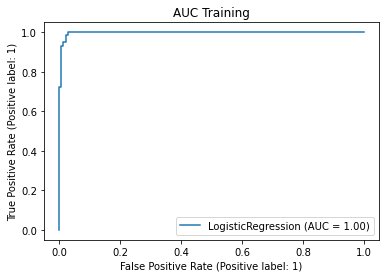

In [15]:
metrics.plot_roc_curve(LG_norm, X_tr_Norm, Y_tr)
plt.title('AUC Training')

#### The AUC curve looks close to 90 degrees indicating good seperation of classes with good agreement between training and validation indicating little evidence of overfitting or underfitting.

#### I didn't plot the validation AUC curve because the statistics were not good enough to be very informative.

### Confusion Matrices

/home/xcite/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'TR')

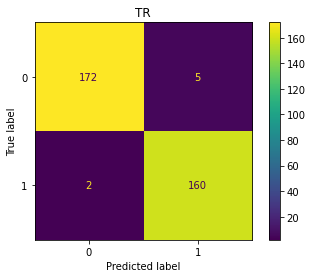

In [16]:
metrics.plot_confusion_matrix(LG_norm, X_tr_Norm, Y_tr) 
plt.title('TR')

/home/xcite/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'VA')

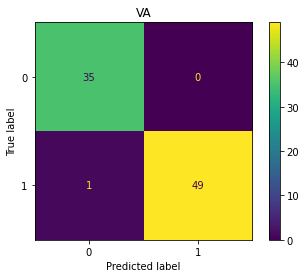

In [17]:
metrics.plot_confusion_matrix(LG_norm, X_va_Norm, Y_va) 
plt.title('VA')

/home/xcite/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'TR, Normalized')

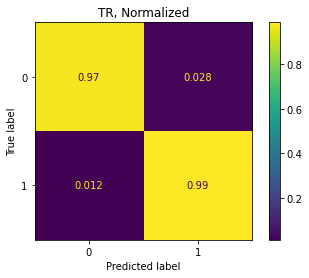

In [18]:
metrics.plot_confusion_matrix(LG_norm, X_tr_Norm, Y_tr,normalize='true') 
plt.title('TR, Normalized')

/home/xcite/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'VA, Normalized')

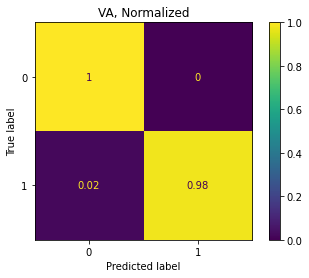

In [19]:
metrics.plot_confusion_matrix(LG_norm, X_va_Norm, Y_va,normalize='true') 
plt.title('VA, Normalized')

#### Looking at the training and validation data confusion matrices there are very few false positives and false negatives. 

#### However there are a few cases that are labeled 1 (benign) when the true class is 0 (malignant) which is a bad thing in cancer data. Thus, we should adjust the threshold to above 0.8 (in this case) to avoid this. Even though this will result in more false positives.

### Print Recall, Accuracy, and Precision

In [20]:
print ("Recall (TR) = ", metrics.recall_score(Y_tr, Y_tr_pred))
print ("Recall (VA) = ", metrics.recall_score(Y_va, Y_va_pred))

Recall (TR) =  0.9876543209876543
Recall (VA) =  0.98


In [21]:
print ("Accuracy (TR) = ", metrics.accuracy_score(Y_tr, Y_tr_pred))
print ("Accuracy (VA) = ", metrics.accuracy_score(Y_va, Y_va_pred))

Accuracy (TR) =  0.9793510324483776
Accuracy (VA) =  0.9882352941176471


In [22]:
print ("Precision (TR) = ", metrics.precision_score(Y_tr, Y_tr_pred))
print ("Precision (VA) = ", metrics.precision_score(Y_va, Y_va_pred))

Precision (TR) =  0.9696969696969697
Precision (VA) =  1.0


#### All metrics are above 0.96 for accuracy, recall, and precision for both training and validation which is very good.

## Bonus

Bonus. For question 4, try to make “the pipeline” from SKlearn (as much as possible) to make your code more organized. See if you can incorporate GridSearch too. This part is more engineering.

#### Here I'll do a simple example doing things this way

In [23]:
from sklearn.pipeline import Pipeline

# Pipeline with scaler and LogisticRegression
pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('logistic', LogisticRegression())])

# Simpler parameter grid for show
param_grid = {'logistic__solver': ['liblinear'],
      'logistic__penalty': ['l1', 'l2'],
      'logistic__max_iter' : [300,400],
      'logistic__class_weight' : ['balanced', None],
      'logistic__fit_intercept' : [True,False]
    }

# Perform the search
search = GridSearchCV(pipe, param_grid)
search.fit(X_bal,Y_bal)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.965):
{'logistic__class_weight': 'balanced', 'logistic__fit_intercept': True, 'logistic__max_iter': 300, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}


#### In this case I don't think it saved me much time or lines of code but I think it would with more complicated models 